# Evaluation of off-target binding of generated molecules on homologous receptors

In [19]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tinymolecule.utils.docking import generate_logs_table

## Data loading

In [21]:
BASE_DIR = Path("../data/pdb_out")

logs_ccr5 = generate_logs_table(BASE_DIR / "valid_sample_1e5" / "logs")
logs_ccr2 = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/valid_sample_1e5_ccr2/logs/summary.csv")

total_molecules = len(logs_ccr5)
logs_ccr5.head()  # preview

,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,affin_kcal_mol-1_10,...,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10,base64_id
0,-8.9,-8.3,-8.3,-8.3,-8.2,-8.1,-8.0,-8.0,-7.8,-7.8,...,8.968,7.124,6.804,8.272,5.938,8.674,7.001,8.568,4.386,f5c4bf40
1,-9.7,-9.4,-9.2,-9.1,-8.5,-8.4,-8.1,-8.0,-8.0,-8.0,...,7.237,3.220,2.763,8.205,8.733,10.832,3.882,8.752,9.361,9f2f1607
2,-10.9,-10.8,-10.5,-10.2,-10.1,-10.0,-9.9,-9.6,-9.3,-9.3,...,9.063,7.328,2.840,10.573,6.107,10.287,10.492,10.706,11.499,814f1cfa
3,-8.6,-8.6,-8.5,-8.5,-8.5,-8.3,-8.3,-8.1,-8.1,-7.7,...,6.951,7.032,8.381,6.441,7.650,8.090,8.987,6.265,3.308,21cb5df6
4,-5.3,-5.2,-5.1,-5.0,-5.0,-4.8,-4.7,-4.5,-4.5,-4.4,...,4.685,3.078,1.129,7.535,6.317,2.691,6.653,5.660,5.612,919dbc1d


## Data validation
### Make sure that CCR5 best binding modes don't have any outliers

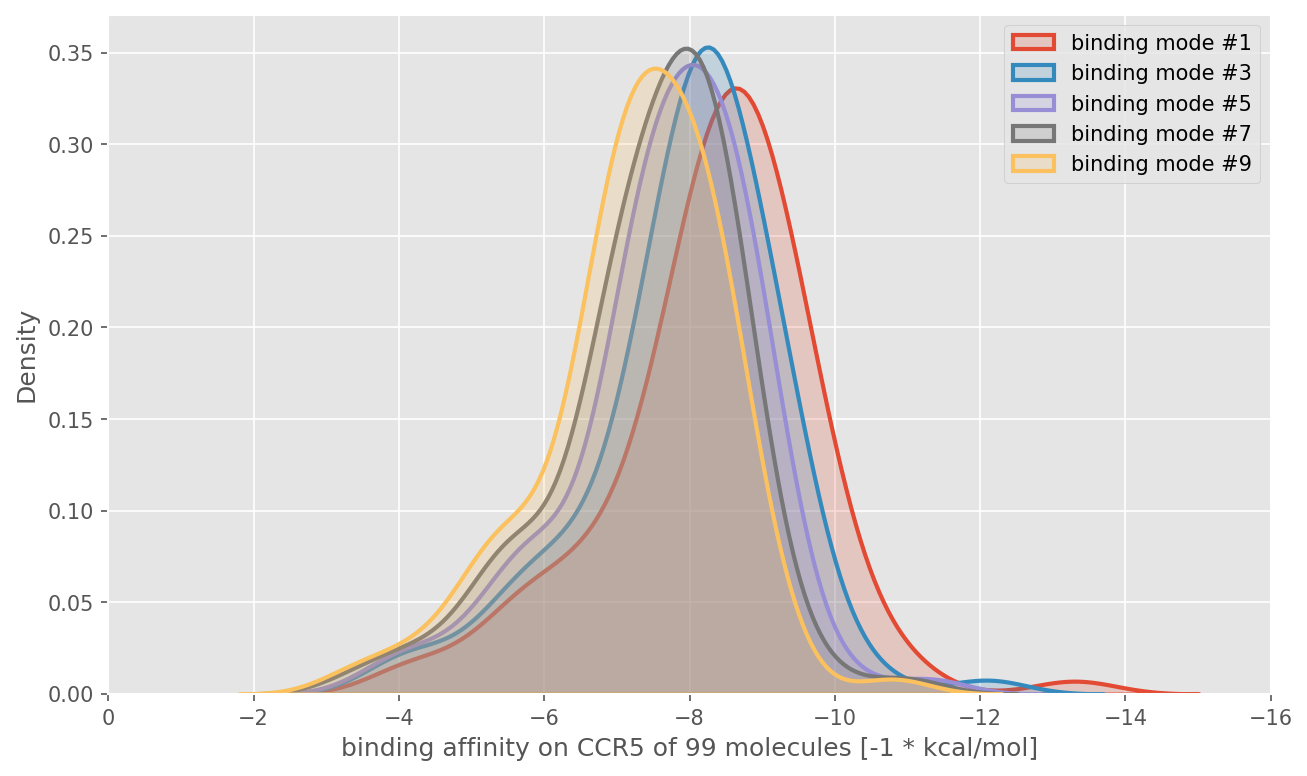

In [104]:
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"], linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_3"], linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_5"], linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_7"], linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_9"], linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, -16)
plt.xlabel(f"binding affinity on CCR5 of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

### CCR2 sanity check

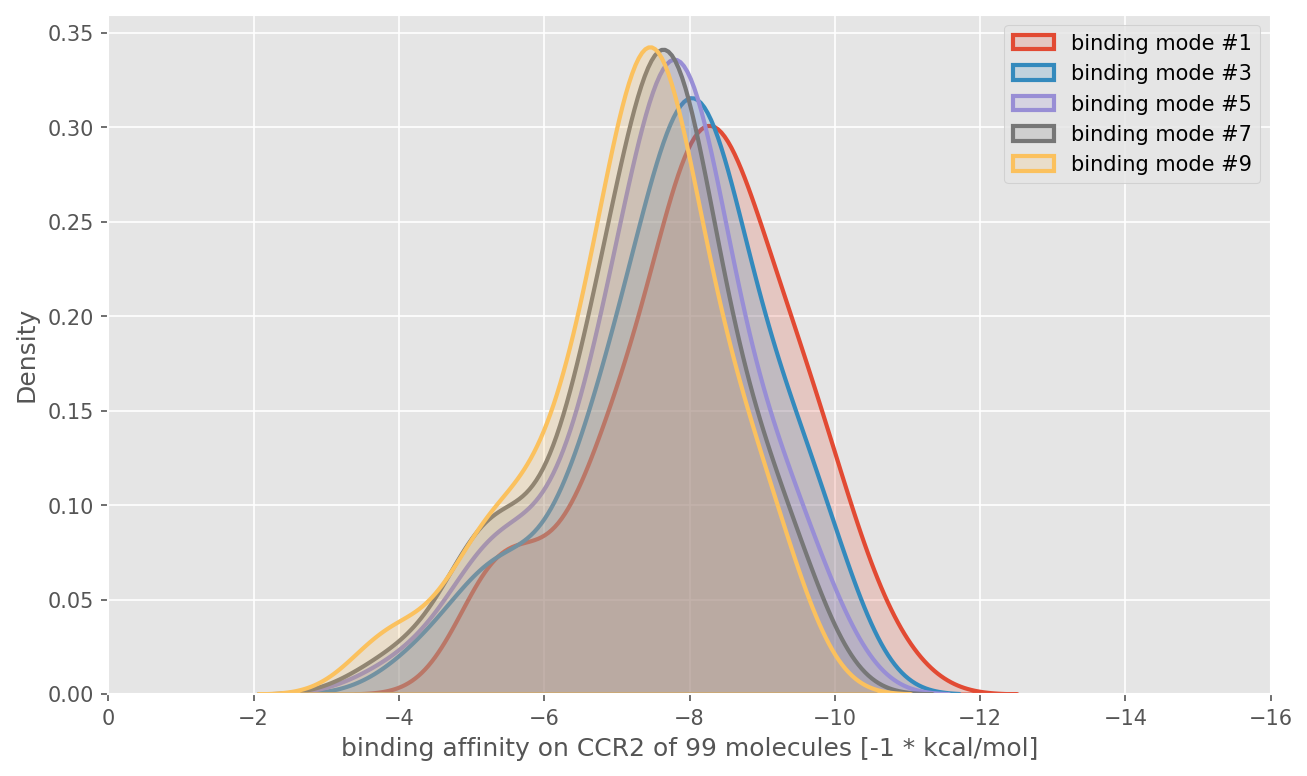

In [105]:
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"], linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_3"], linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_5"], linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_7"], linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_9"], linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, -16)
plt.xlabel(f"binding affinity on CCR2 of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

## Comparison
### Best binding mode

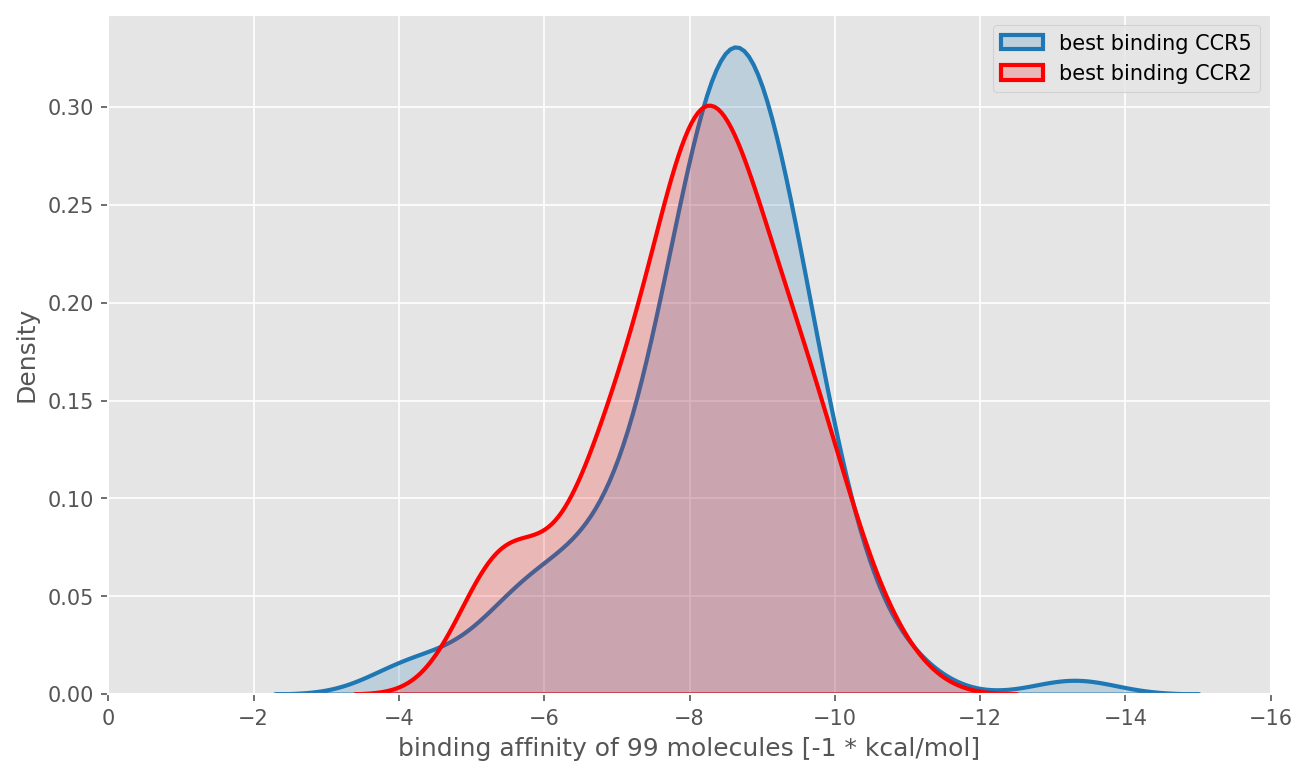

In [100]:
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"], linewidth=2, label="best binding CCR5", fill=True, alpha=.2, color="#1f77b4")
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"], linewidth=2, label="best binding CCR2", fill=True, alpha=.2, color="red")

plt.xlim(0, -16)
plt.xlabel(f"binding affinity of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

### Correlation of binding affinity

In [27]:
combined_logs = pd.merge(logs_ccr5, logs_ccr2, on="base64_id")
combined_logs.head()

,affin_kcal_mol-1_1_x,affin_kcal_mol-1_2_x,affin_kcal_mol-1_3_x,affin_kcal_mol-1_4_x,affin_kcal_mol-1_5_x,affin_kcal_mol-1_6_x,affin_kcal_mol-1_7_x,affin_kcal_mol-1_8_x,affin_kcal_mol-1_9_x,affin_kcal_mol-1_10_x,...,best_dist_rmsd_ub_1_y,best_dist_rmsd_ub_2_y,best_dist_rmsd_ub_3_y,best_dist_rmsd_ub_4_y,best_dist_rmsd_ub_5_y,best_dist_rmsd_ub_6_y,best_dist_rmsd_ub_7_y,best_dist_rmsd_ub_8_y,best_dist_rmsd_ub_9_y,best_dist_rmsd_ub_10_y
0,-8.9,-8.3,-8.3,-8.3,-8.2,-8.1,-8.0,-8.0,-7.8,-7.8,...,0.0,7.648,1.616,7.941,8.356,4.230,9.748,8.603,9.460,2.855
1,-9.7,-9.4,-9.2,-9.1,-8.5,-8.4,-8.1,-8.0,-8.0,-8.0,...,0.0,6.728,9.361,8.902,5.682,9.335,9.426,8.244,9.545,4.915
2,-10.9,-10.8,-10.5,-10.2,-10.1,-10.0,-9.9,-9.6,-9.3,-9.3,...,0.0,10.194,2.169,3.315,10.374,2.024,4.151,10.780,13.028,6.084
3,-8.6,-8.6,-8.5,-8.5,-8.5,-8.3,-8.3,-8.1,-8.1,-7.7,...,0.0,8.510,8.650,8.556,8.302,6.413,9.694,7.833,3.456,2.067
4,-5.3,-5.2,-5.1,-5.0,-5.0,-4.8,-4.7,-4.5,-4.5,-4.4,...,0.0,2.644,7.146,1.857,4.954,4.217,22.335,6.758,8.665,4.882


<Figure size 660x660 with 0 Axes>

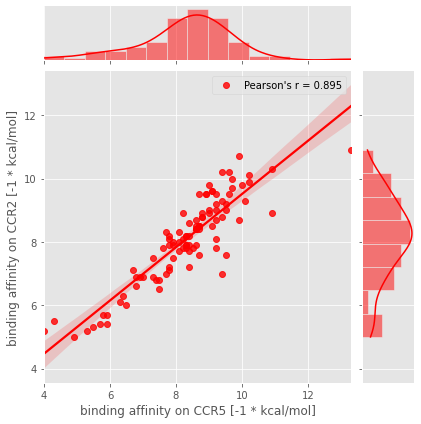

In [50]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1_y"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="red")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR2 [-1 * kcal/mol]")
plt.legend()
plt.show()

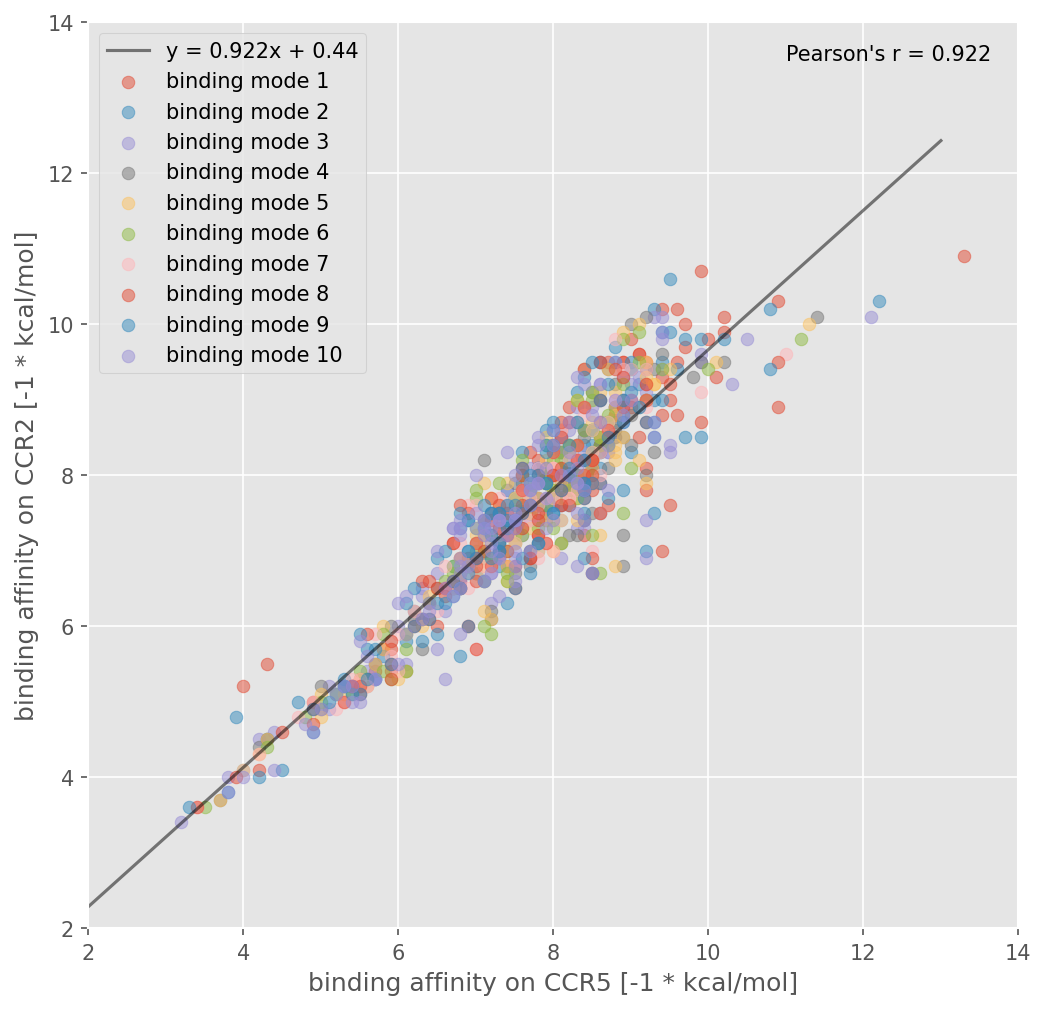

In [86]:
plt.figure(figsize=(8, 8), dpi=150)

x = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_x"] for i in range(1, 11)], axis=0, ignore_index=True) * (-1)
y = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_y"] for i in range(1, 11)], axis=0, ignore_index=True) * (-1)
r = stats.pearsonr(x, y)[0]
k, b = np.polyfit(x, y, 1)

for i in range(1, 11):
    plt.scatter(
        combined_logs[f"affin_kcal_mol-1_{i}_x"] * (-1),
        combined_logs[f"affin_kcal_mol-1_{i}_y"] * (-1),
        alpha=0.5, label=f"binding mode {i}")

plt.plot(np.arange(2, 14), k*np.arange(2, 14)+ b, color="black", alpha=0.5, label=f"y = {round(k, 3)}x + {round(b, 3)}")
plt.xlim(2, 14)
plt.ylim(2, 14)
plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR2 [-1 * kcal/mol]")
plt.legend()
plt.text(x=11, y=13.5, s=f"Pearson's r = {round(r, 3)}")
plt.show()